In [5]:
import pandas as pd
import numpy as np

def load_data(file_path, sheet_name):
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    return df

def get_dimensions(matrix):
    dimensions = matrix.shape
    print(f"Dimensions of the matrix: {dimensions}")

def count_rows(matrix):
    num_rows = matrix.shape[0]
    print(f"Number of rows in the matrix: {num_rows}")

def matrix_rank(matrix):
    rank = np.linalg.matrix_rank(matrix)
    print(f"Rank of the matrix: {rank}")

def calculate_costs(matrix_A, matrix_B):
    pseudo_inverse_A = np.linalg.pinv(matrix_A)
    costs = np.dot(pseudo_inverse_A, matrix_B)
    return costs

def categorize_customers(data_frame):
    data_frame['Category'] = data_frame['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')
    print(data_frame)

def main():
    file_path = "C:/Users/DELL/Downloads/Lab Session Data (1).xlsx"
    sheet_name = 'Purchase data'
    df = load_data(file_path, sheet_name)

    selected_columns = df[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]
    print("Selected columns:")
    print(selected_columns)
    
    matrix_A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    matrix_B = df[['Payment (Rs)']].values
    
    print("\nMatrix A:")
    print(matrix_A)
    print("\nMatrix B:")
    print(matrix_B)
    
    get_dimensions(matrix_A)
    count_rows(matrix_A)
    matrix_rank(matrix_A)
    costs = calculate_costs(matrix_A, matrix_B)
    print("\nCost of each product available for sale:")
    print(costs)
    
    categorize_customers(df)

if __name__ == "__main__":
    main()


Selected columns:
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198

Matrix A:
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]

Matrix B:
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]

Mean of Price data: 1560.663453815261
Variance of Price data: 58732.365352539186
Mean price for Wednesdays: 1550.706
Difference from overall mean: -9.957453815261033
Mean price for April: 1698.9526315789474
Difference from overall mean: 138.28917776368644
Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Conditional probability of making a profit, given it's Wednesday: 0.8433870967741935


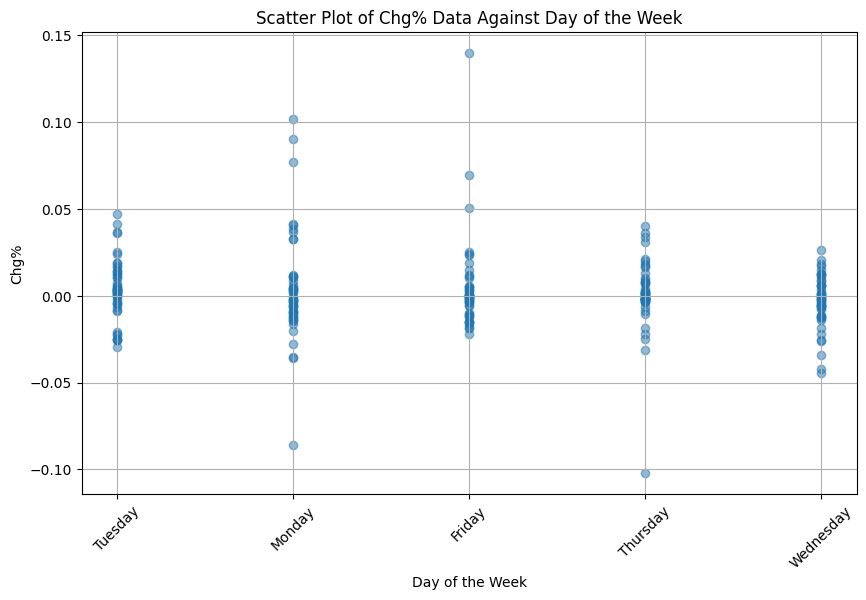

In [7]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

def load_data(file_path, sheet_name):
    data_frame = pd.read_excel(file_path, sheet_name=sheet_name)
    return data_frame

def compute_mean_variance(df):
    price_values = df['Price']
    mean_price = statistics.mean(price_values)
    variance_price = statistics.variance(price_values)
    print(f"Mean of Price data: {mean_price}")
    print(f"Variance of Price data: {variance_price}")
    return mean_price

def mean_wednesday_prices(df, overall_mean):
    wednesday_data = df[df['Day'] == 'Wed']
    wednesday_prices = wednesday_data['Price']
    mean_wednesday_price = statistics.mean(wednesday_prices)
    print(f"Mean price for Wednesdays: {mean_wednesday_price}")
    print(f"Difference from overall mean: {mean_wednesday_price - overall_mean}")

def mean_april_prices(df, overall_mean):
    april_data = df[df['Month'] == 'Apr']
    april_prices = april_data['Price']
    mean_april_price = statistics.mean(april_prices)
    print(f"Mean price for April: {mean_april_price}")
    print(f"Difference from overall mean: {mean_april_price - overall_mean}")

def loss_probability(df):
    change_percent = df['Chg%']
    loss_count = sum(change_percent.apply(lambda x: x < 0))
    loss_prob = loss_count / len(change_percent)
    print(f"Probability of making a loss: {loss_prob}")
    return loss_prob

def profit_probability_wednesday(df):
    wednesday_data = df[df['Day'] == 'Wed']
    wednesday_change_percent = wednesday_data['Chg%']
    profit_count = sum(wednesday_change_percent.apply(lambda x: x > 0))
    profit_prob_wednesday = profit_count / len(wednesday_change_percent)
    print(f"Probability of making a profit on Wednesday: {profit_prob_wednesday}")
    return profit_prob_wednesday

def conditional_profit_probability(df, prob_wednesday):
    change_percent = df['Chg%']
    total_profit_count = sum(change_percent.apply(lambda x: x > 0))
    total_profit_prob = total_profit_count / len(change_percent)
    conditional_prob = prob_wednesday / total_profit_prob if total_profit_prob > 0 else 0
    print(f"Conditional probability of making a profit, given it's Wednesday: {conditional_prob}")
    return conditional_prob

def plot_chg_day(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day_name()
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Day'], df['Chg%'], alpha=0.5)
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.title('Scatter Plot of Chg% Data Against Day of the Week')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def main():
    file_path = "C:/Users/DELL/Downloads/Lab Session Data (1).xlsx"
    sheet_name = 'IRCTC Stock Price'
    
    df = load_data(file_path, sheet_name)
    
    overall_mean = compute_mean_variance(df)
    
    mean_wednesday_prices(df, overall_mean)
    
    mean_april_prices(df, overall_mean)
    
    loss_probability(df)
    
    prob_wednesday = profit_probability_wednesday(df)
    
    conditional_profit_probability(df, prob_wednesday)
    
    plot_chg_day(df)

if __name__ == "__main__":
    main()
